In [5]:
# 코드를 통한 실습
# 사이킷런에서 제공하는 데이터셋을 사용하는 방법을 알아봅니다.
# 사이킷런에서 제공하는 데이터셋은 딕셔너리 형태로 되어 있습니다.
# 데이터셋을 불러오고, 데이터셋의 형태를 확인해봅니다.
# 데이터셋을 불러오는 방법은 datasets 모듈을 불러오고, load_데이터셋명() 함수를 사용합니다.
from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X.shape)  # 4개의 feature를 가진 150개의 데이터입니다.
random_state = np.random.RandomState(0) # seed를 고정합니다.
n_samples, n_features = X.shape # 150개의 데이터와 4개의 feature가 있습니다.
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)] # np.c_[]를 사용하여 feature를 추가합니다.
# X는 random_state.randn(n_samples, 200 * n_features)를 추가하게 되면 804개의 feature를 가진 150개의 데이터가 됩니다.

print(X.shape)  # 804개의 feature를 가진 150개의 데이터가 되었습니다.
#- 0, 1 라벨에 속하는 붓꽃 샘플만 사용하도록 제한합니다.
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

print("훈련, 테스트 셋에 사용된 라벨의 종류: {} ".format( set(y_test)))
print("훈련 데이터 shape   :", X_train.shape)
print("테스트 데이터 shape :", X_test.shape)
# 두개의 라벨로 나뉜 데이터를 가지고, SVM(Support Vector Machine)을 사용하여 분류를 해봅니다.
# SVM은 데이터를 분류하는 경계선을 찾아주는 알고리즘입니다.
# SVM은 선형 분류와 비선형 분류를 모두 지원합니다.
# 여기서는 비선형 분류를 위해 kernel='poly'를 사용합니다.
# test 데이터에 대한 정확도를 출력합니다.
from sklearn import svm

classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)
# kernel='poly' 대신 kernel='linear'를 사용하면 선형 분류를 수행합니다.
# test 데이터에 대한 정확도를 출력합니다.
classifier = svm.SVC(kernel='linear', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)
# classifer.predict() 함수를 사용하여 테스트 데이터에 대한 예측을 수행합니다.
classifier.predict(X_test)
y_test
y_score = classifier.decision_function(X_test)
print(y_score)
from sklearn.metrics import confusion_matrix, classification_report

y_pred = classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred)
print(rpt_result)
y_pred_new_threshold = classifier.decision_function(X_test) > -0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)
y_pred_new_threshold = classifier.decision_function(X_test) > -0.2
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)
y_pred_new_threshold = classifier.decision_function(X_test) > 0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)
y_pred_new_threshold = classifier.decision_function(X_test) > 0.2
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)


(150, 4)
(150, 804)
훈련, 테스트 셋에 사용된 라벨의 종류: {np.int64(0), np.int64(1)} 
훈련 데이터 shape   : (50, 804)
테스트 데이터 shape : (50, 804)
[-0.29512751  0.28798352  0.17635465  0.19056886  0.38391605 -0.30841065
 -0.10084254 -0.23481309  0.18576987 -0.36011033 -0.15726747 -0.25714889
 -0.14979669  0.02063898  0.04509171 -0.17239443  0.07287957 -0.0689103
 -0.13452462 -0.30697712  0.25404241 -0.28916471 -0.52061453  0.25252233
  0.02177777 -0.10980907  0.37468422  0.35303004 -0.6211302  -0.42920064
 -0.14770647  0.00593404 -0.34735296  0.32245409 -0.19439024  0.1288847
 -0.0320947  -0.23008604 -0.10135548 -0.46962186  0.05184235  0.0609688
  0.05632596  0.44769206 -0.38804349  0.24704844  0.16063684  0.0144203
 -0.03136574  0.11179177]
[[20  4]
 [ 6 20]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.83      0.77      0.80        26

    accuracy                           0.80        50
   macro avg       0.80      0.80

# ROC (Reveiver Operating Characteristic Curve)  

: 수신자 조작 특성 곡선

ROC는 앞서 계산해보았던 Confusion Matrix 수치를 활용해, 분류기의 분류 능력을 그래프로 표현하는 방법

#### ROC 예시 곡선
<hr style="opacity:0.2;">

ROC를 그리는 축인 TP Rate와 FP Rate는 Precision, Recall과 비슷해보이지만 조금 다른 개념

$$
\text{TPR} = \frac{TP}{TP + FN}
$$

$$
\text{FPR} = \frac{FP}{FP + TN}
$$

TPR 은 Recall과 같고, FPR은 1 - Specificity 로 실제 음성 중에서 얼마나 잘못맞췄는지를 의미한다.

#### ROC AUC(Area Under the ROC Curve)
<hr style='opacity:0.2;'>

영역의 넓이가 넓은 모델일수록, 상대적으로 좋은 성능을 보여준다고 합니다. 하지만 PR 커브만큼 직관적으로 와닿지 않아서, 왜 그런 것인지 얼른 와닿지 않습니다. 그렇다면 일단 한번 그려 보겠습니다. 사이킷런에는 `roc_curve`, `auc` 라는 함수를 통해 ROC를 그리거나 ROC AUC를 쉽게 구해볼 수 있습니다.

In [3]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print("🌜    .\n·   *\n  *   *\n🌲 🐕 🌳")

🌜    .
·   *
  *   *
🌲 🐕 🌳


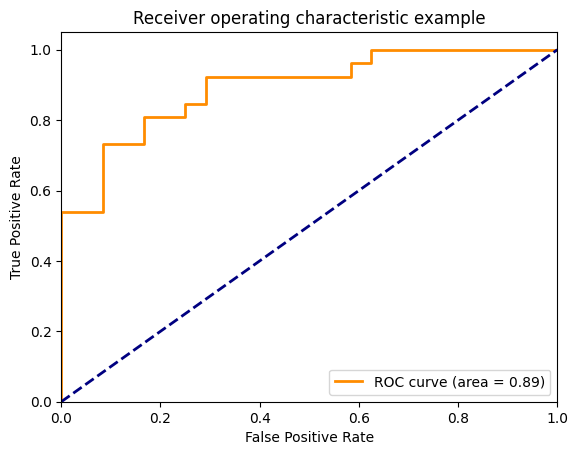

auc result:0.8926282051282052


In [6]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"auc result:{roc_auc}")

아주 이상적으로 Precision과 Recall이 전부 1이 되는 완벽한 모델이라면 ROC 커브에서는 어디에 점이 찍힐까요? 네, 바로 (0, 1)일 것입니다. 양성과 음성에 대한 Recall이 모두 1이 될 테니 TPR은 1, FPR은 0이 될 것입니다.

몇가지 극단적인 경우를 생각해 봅시다. 모델이 모든 샘플에 대해 양성이라고 분류한다면 어떨까요? 이땐 이 분류기가 (1, 1)에 찍힐 것입니다. 반대로 모든 샘플에 대해 음성이라고 분류한다면 이 분류기는 (0, 0)에 찍힐 것입니다. 이번엔 완벽한 랜덤 분류기를 가정해 봅시다. 이 분류기는 양성이든 음성이든 무관하게 p의 확률로 양성이라고 분류할 것입니다. 이 랜덤분류기의 Recall은 p가 될 것입니다. 음성에 대한 Recall도 p가 될 테니 이 분류기는 (p, 1-p)에 찍힐 것입니다.

위 그래프에서 (0, 0)과 (1, 1)을 잇는 파란 점선은 바로 위와 같은 극단적인 경우들만 모아놓은 경우입니다. 그래서 의미있는 분류기라면 적어도 이 파란 점선보다는 위쪽에 그려져야 하며, 가급적 (0, 1)에 가깝게 그려질 수록 우수한 분류기가 됩니다. 그러므로 ROC AUC가 클수록 상대적으로 좋은 성능의 모델이라고 할 수 있을 것입니다.

Kernel: linear, AUC: 0.8926282051282052
Kernel: poly, AUC: 0.8605769230769231
Kernel: rbf, AUC: 0.8878205128205128
Kernel: sigmoid, AUC: 0.8798076923076923


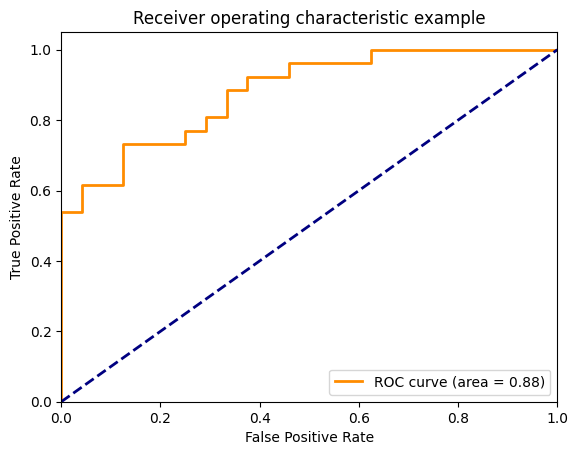

auc result:0.8798076923076923


In [ ]:
# SVM 커널의 종류를 바꿔 가며 ROC 커브를 그리고 ROC AUC 값을 구하는 코드를 직접 작성해보세요.
# SVM 커널의 종류를 바꿔가며 ROC 커브를 그리고 ROC AUC 값을 구합니다.
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    classifier = svm.SVC(kernel=kernel, random_state=random_state, probability=True)
    classifier.fit(X_train, y_train)
    y_score = classifier.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    print(f"Kernel: {kernel}, AUC: {roc_auc}")

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"auc result:{roc_auc}")